In [1]:
#Transformada de Fourier
from scipy.fft import fft, fft2, fftfreq, ifft

from scipy import signal

import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams['font.family'] = 'CMU Serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']
plt.rcParams['text.usetex'] = False

plt.rcParams['font.size'] = 15
plt.rcParams['axes.linewidth'] = 2

# Osciladores Usados

In [3]:
def squr(x):
    if np.sin(x) < 0:
        return 0
    return 1

def trig(x):
    if x < np.pi:
        return x/np.pi
    return -(x-2*np.pi)/np.pi
    
sine = np.sin

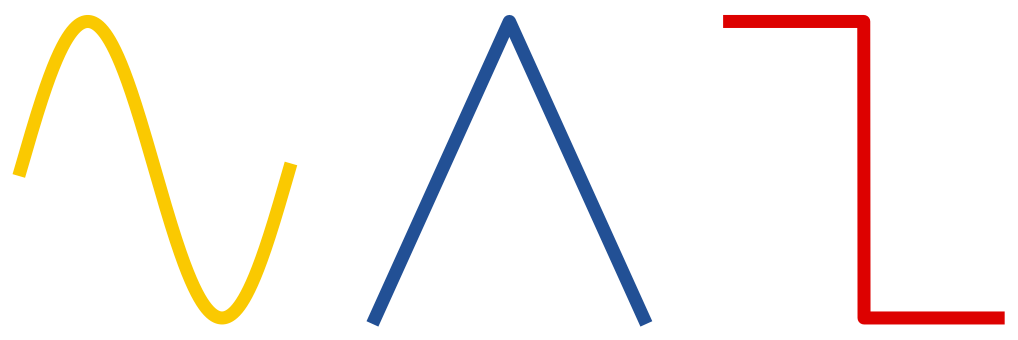

In [4]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

x = np.linspace(0, 2*np.pi, 1000)
ax1.plot(x, sine(x), color='#fac901',              lw=13)
ax2.plot(x, [trig(i) for i in x], color='#225095', lw=13)
ax3.plot(x, [squr(i) for i in x], color='#DD0100', lw=13)

[ax.axis(False) for ax in [ax1, ax2, ax3]]

plt.plot()

plt.savefig('Osciladores.eps')

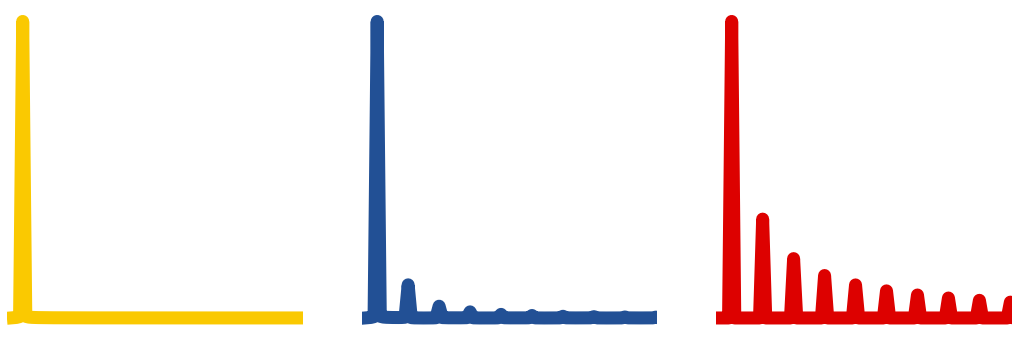

In [5]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

x = np.linspace(0, 10*np.pi, 1000)
ax1.plot(x[2:], np.abs(fft(sine(x)                              ))[2:], color='#fac901', lw=13)
ax2.plot(x[2:], np.abs(fft(np.abs(signal.sawtooth(-np.pi/2 + x))))[2:], color='#225095', lw=13)
ax3.plot(x[2:], np.abs(fft([squr(i) for i in x]                 ))[2:], color='#DD0100', lw=13)



[ax.axis(False) for ax in [ax1, ax2, ax3]]
[ax.set_xlim(0, 3) for ax in [ax1, ax2, ax3]]
 

plt.savefig('FFTs.eps')

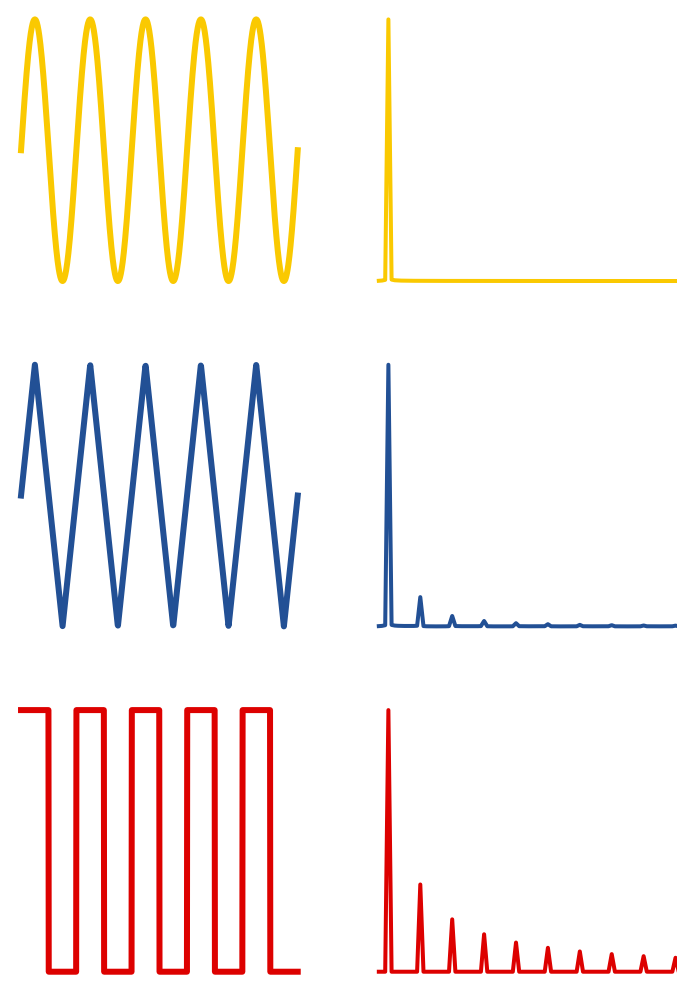

In [6]:
fig = plt.figure(figsize=(12, 18))

ax11 = fig.add_subplot(3, 2, 1)
ax12 = fig.add_subplot(3, 2, 3)
ax13 = fig.add_subplot(3, 2, 5)

ax21 = fig.add_subplot(3, 2, 2)
ax22 = fig.add_subplot(3, 2, 4)
ax23 = fig.add_subplot(3, 2, 6)

axis = [ax11, ax12, ax13, ax21, ax22, ax23]
for ax in axis:
    ax.axis(False)

x = np.linspace(0, 10*np.pi, 1000)
ax11.plot(x, sine(x)                               , color='#fac901',              lw=6)
ax12.plot(x, np.abs(signal.sawtooth(-np.pi/2 + x)) , color='#225095', lw=6)
ax13.plot(x, [squr(i) for i in x]                  , color='#DD0100', lw=6)

ax21.plot(x[2:], np.abs(fft(sine(x)                              ))[2:], color='#fac901', lw=4)
ax22.plot(x[2:], np.abs(fft(np.abs(signal.sawtooth(-np.pi/2 + x))))[2:], color='#225095', lw=4)
ax23.plot(x[2:], np.abs(fft([squr(i) for i in x]                 ))[2:], color='#DD0100', lw=4)

[ax.set_xlim(0, 3) for ax in [ax21, ax22, ax23]]

plt.plot()

plt.savefig('OSC_FFT.eps')

# Envelope

In [7]:
def env(x, at, dt):
    if x < at and x > 0:
        return x/at
    if x >= at and x < dt + at:
        return -(x - (at + dt))/(dt)
    return 0

findfont: Font family ['CMU Serif'] not found. Falling back to DejaVu Sans.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
findfont: Font family ['CMU Serif'] not found. Falling back to DejaVu Sans.


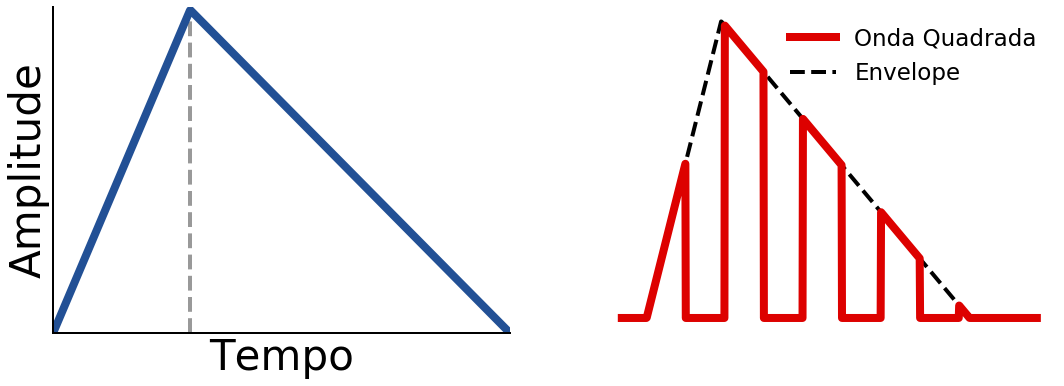

In [8]:
fig = plt.figure(figsize=(18, 6))
ax  = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

x = np.linspace(0, 10, 1000)
ax.plot(x, [env(i, 3, 7) for i in x], lw=8, color='#225095')

ax.vlines(3, 0, 1, linestyle='--', alpha = 0.4, lw=4)

ax.set_ylabel('Amplitude', fontsize = 42)
ax.set_xlabel('Tempo',     fontsize = 42)

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')

ax.set_xticks([])
ax.set_yticks([])

ax.set_xlim(0, 10)
ax.set_ylim(0, 1.01)

x = np.linspace(-1, 5*np.pi, 1000)
ax2.plot(x, [squr(2*i)*env(i, 3, 10) for i in x], color='#DD0100', lw=8, label = 'Onda Quadrada')
ax2.plot(x, [env(i, 3, 10) for i in x], '--', lw=4, color='black', zorder=0, label = 'Envelope')
ax2.legend(loc='upper right', frameon=False, fontsize = 23)

ax2.axis(False)

plt.savefig('Envelope_Exemplo.eps')

# Osciladores x Envelope

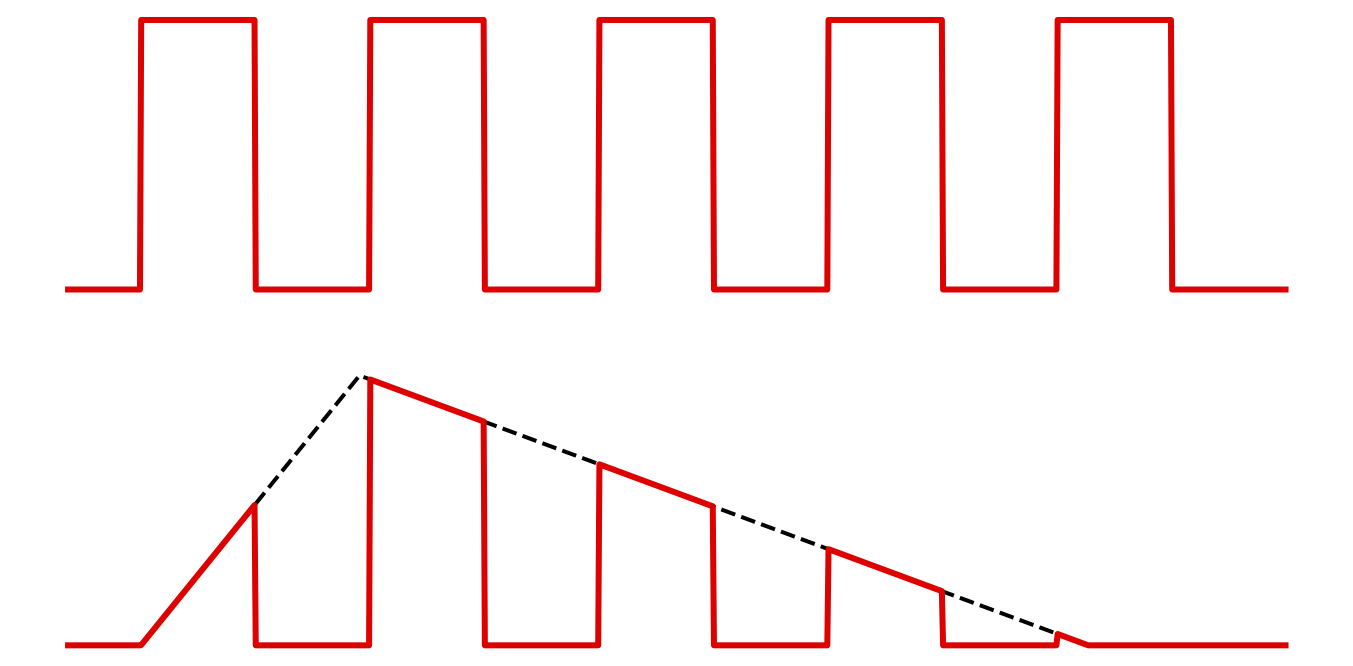

In [9]:
fig = plt.figure(figsize=(24, 12))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)


x = np.linspace(-1, 5*np.pi, 1000)
ax1.plot(x, [squr(2*i) for i in x], color='#DD0100', lw=6)
ax2.plot(x, [squr(2*i)*env(i, 3, 10) for i in x], color='#DD0100', lw=6)
ax2.plot(x, [env(i, 3, 10) for i in x], '--', lw=4, color='black', zorder=0)

ax1.axis(False)
ax2.axis(False)

plt.savefig('Osc_Env.eps')

# Filtro

Butterworth filter

In [10]:
def butter(w, n, wc):
    return 1/(np.sqrt(1 + (w/wc)**(2*n)))

/Users/thomasgaehtgens/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
findfont: Font family ['CMU Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['CMU Serif'] not found. Falling back to DejaVu Sans.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; p

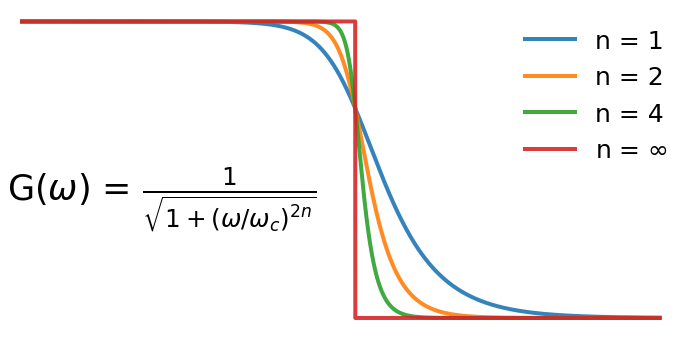

In [11]:
fig = plt.figure(figsize=(12, 6))
ax  = fig.add_subplot()

freq = np.linspace(0, 10**7, 1000000)

ax.text(5**3, 0.4, r'G($\omega$) = $\frac{1}{\sqrt{1 + (\omega/\omega_c)^{2n}}}$' , ha='center', va='center', rotation='horizontal', fontsize=35, alpha = 1)

ax.plot(freq, butter(freq, 1, 10000), lw=4,         label='n = 1'       , alpha=0.9)
ax.plot(freq, butter(freq, 2, 10000), lw=4,         label='n = 2'       , alpha=0.9)
ax.plot(freq, butter(freq, 4, 10000), lw=4,         label='n = 4'       , alpha=0.9)
ax.plot(freq, butter(freq, 100000000, 10000), lw=4, label='n = $\infty$', alpha=0.9)

ax.legend(loc='upper right', frameon=False, fontsize=25)
ax.set_xscale('log')

ax.axis(False)

plt.savefig('Butter.eps')

In [12]:
def butter_Q(w, n, wc, a, b, c):
    return 1/(np.sqrt(1 + (w/wc)**(2*n))) + a*np.e**(-b*(w-wc)**2)

def Q(w, n, wc, a, b, c):
    return a*np.exp(-b*(w-wc)**2)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
findfont: Font family ['CMU Serif'] not found. Falling back to DejaVu Sans.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


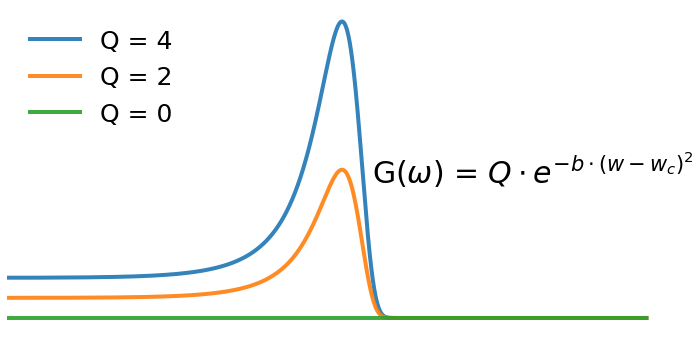

In [13]:
fig = plt.figure(figsize=(12, 6))
ax  = fig.add_subplot()

freq = np.linspace(0, 10**7, 1000000)

ax.text(4.5**9, 0.2, r'G($\omega$) = $Q \cdot e^{-b \cdot (w-w_c)^2}$' , ha='center', va='center', rotation='horizontal', fontsize=30, alpha = 1)

ax.plot(freq, Q(freq, 2, 10000, 0.4, 2e-8, 1), lw=4,         label='Q = 4'       , alpha=0.9)
ax.plot(freq, Q(freq, 2, 10000, 0.2, 2e-8, 1), lw=4,         label='Q = 2'       , alpha=0.9)
ax.plot(freq, Q(freq, 2, 10000, 0, 2e-8, 1), lw=4,           label='Q = 0', alpha=0.9)

ax.legend(loc='upper left', frameon=False, fontsize=25)
ax.set_xscale('log')

ax.axis(False)

plt.savefig('Q.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


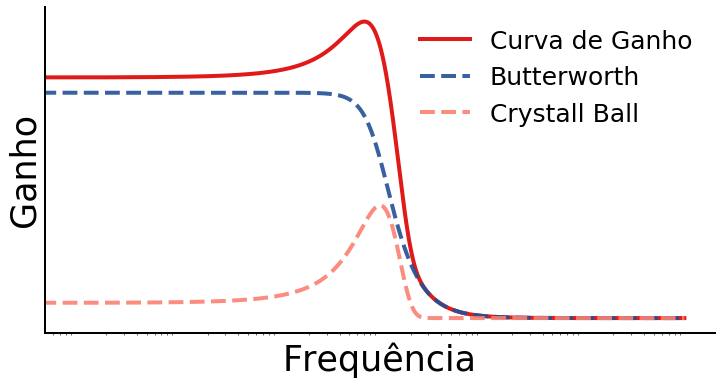

In [14]:
ax.plot(freq, butter_Q(freq, 1, 10000, 1, 1, 1), lw=4,         label='n = 1'       , alpha=0.9)

fig = plt.figure(figsize=(12, 6))
ax  = fig.add_subplot()

freq = np.linspace(0, 10**7, 1000000)

ax.plot(freq, butter_Q(freq, 2, 10000, 0.5, 2e-8, 1), lw=4, label='Curva de Ganho', alpha=0.9, color='#DD0100')
ax.plot(freq, butter(freq, 2, 10000), linestyle = '--', lw=4, label='Butterworth', alpha=0.9, color='#225095')
ax.plot(freq, Q(freq, 2, 10000, 0.5, 2e-8, 1), linestyle = '--', lw=4, label='Crystall Ball', alpha=0.9, color='salmon')

ax.legend(loc='upper right', frameon=False, fontsize=25)
ax.set_xscale('log')

ax.set_ylabel('Ganho', fontsize = 35)
ax.set_xlabel('Frequência', fontsize = 35)

ax.set_xticks([])
ax.set_yticks([])

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.savefig('Filtro.eps')